In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from utilsforecast.plotting import plot_series

# Generate a time series with multiple multiplicative seasonalities
np.random.seed(0)
n_days = 365  # One year of data
n_hrs = 365*24
# Create a date range
date_range = pd.date_range(start='2023-01-01', periods=n_days, freq='D')

date_range_hr = pd.date_range(start='2023-01-01', periods=n_hrs, freq='h')

# Define seasonal components
daily_seasonality = 1 + 0.1 * np.sin(2 * np.pi * date_range_hr.hour / 24)+1 
# weekly_seasonality = 1 + 0.2 * np.sin(2 * np.pi * date_range_hr.weekday / 7)
monthly_seasonality = 1 + 0.3 * np.sin(2 * np.pi * date_range_hr.dayofyear / 365)

# Define a trend component
trend = 50 + 0.1 * np.arange(n_hrs)

In [74]:
len(date_range_hr)

8760

In [75]:
date_range[-1]

Timestamp('2023-12-31 00:00:00')

In [76]:
date_range_hr[-1]

Timestamp('2023-12-31 23:00:00')

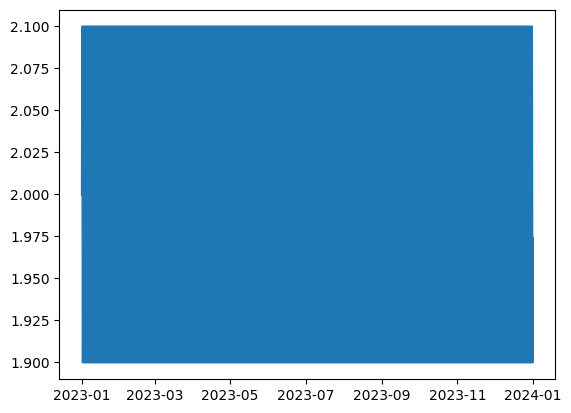

In [77]:
plt.plot(date_range_hr, daily_seasonality, label='Daily seasonality')
effective_seasonality = daily_seasonality  * monthly_seasonality

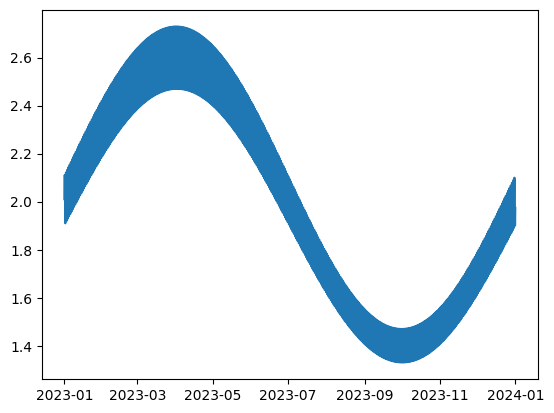

In [78]:
plt.plot(date_range_hr, effective_seasonality, label='Effective seasonality')

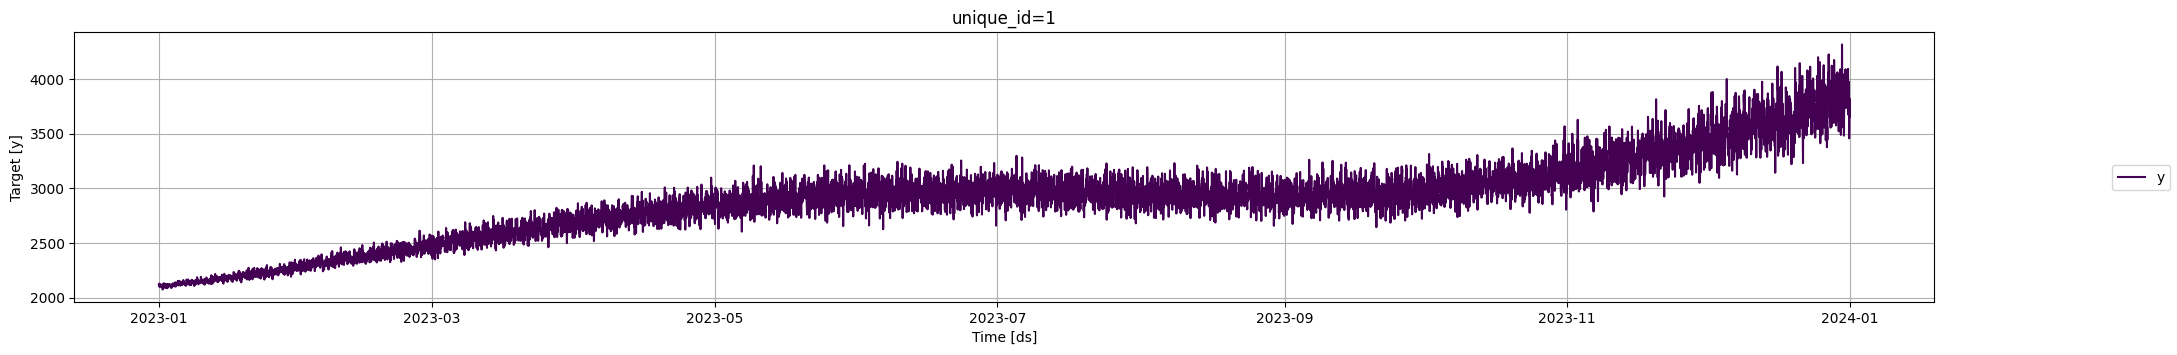

In [79]:

# Combine seasonal components and add some noise
data = trend * daily_seasonality  * monthly_seasonality * (1 + 0.1 * np.random.normal(0, 1, n_hrs))+2000
data_sess = trend * (1 + 0.1 * np.random.normal(0, 1, n_hrs))+2000
# Create a DataFrame
df = pd.DataFrame({'ds': date_range_hr, 'y': data , 'unique_id': 1})
df2= pd.DataFrame({'ds': date_range_hr, 'y': data_sess , 'unique_id': 2})
plot_series(df)

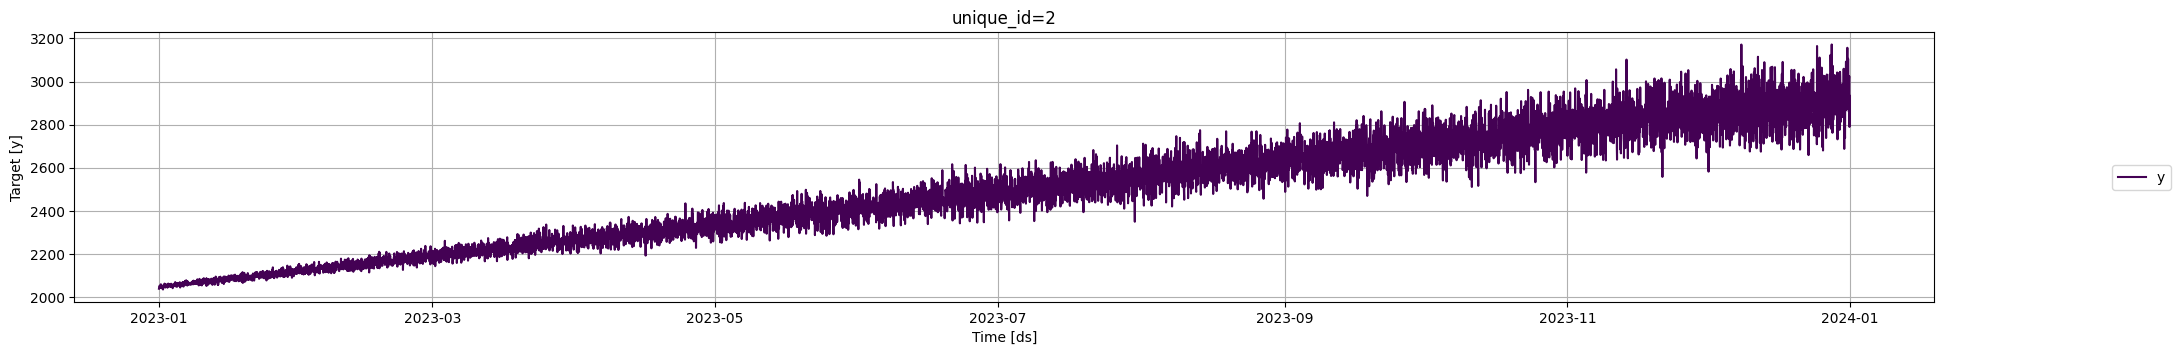

In [80]:
plot_series(df2)

In [68]:
df.shape

(8760, 3)

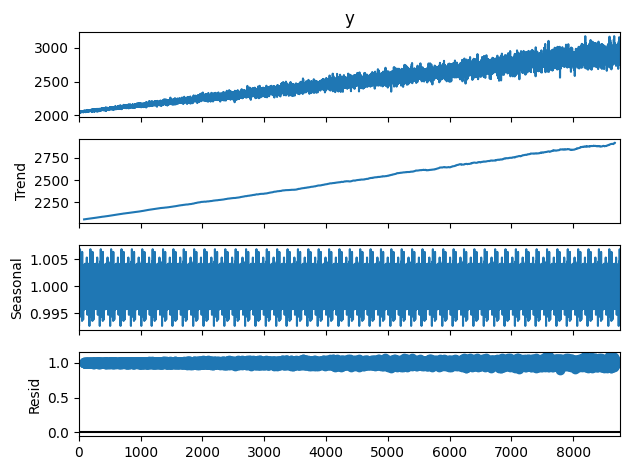

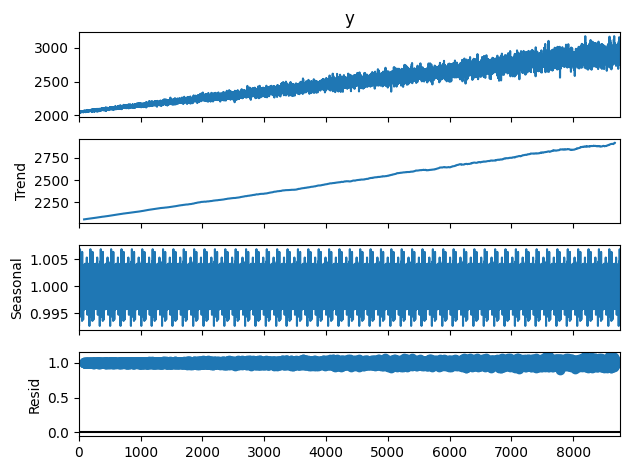

In [83]:
decomposition = seasonal_decompose(df2['y'], model='multiplicative', period=int(24*7))

decomposition.plot()

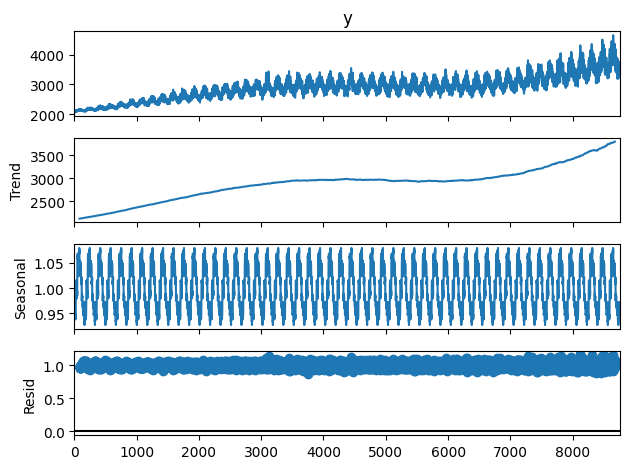

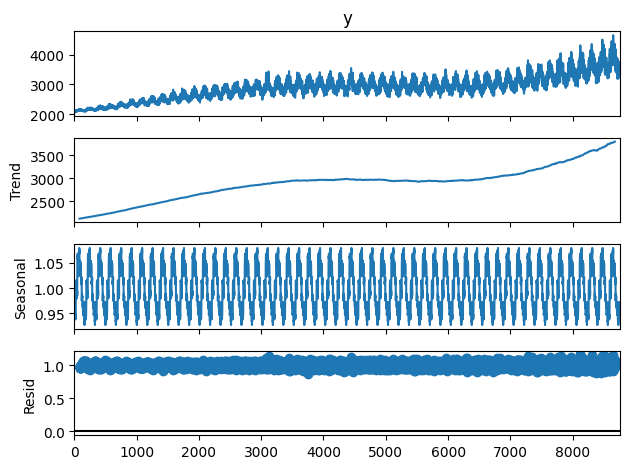

In [67]:
decomposition = seasonal_decompose(df['y'], model='multiplicative', period=int(24*7))

decomposition.plot()

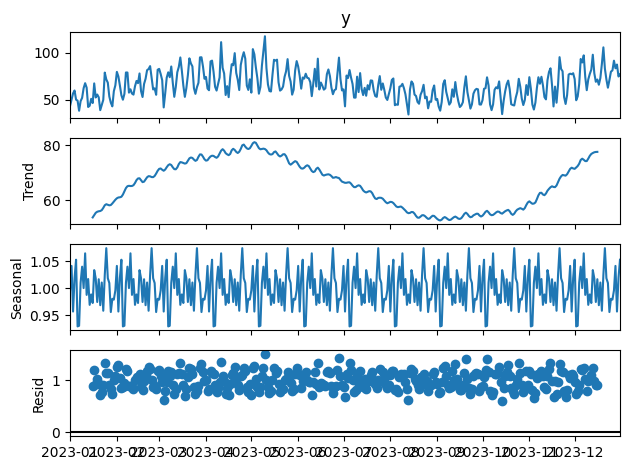

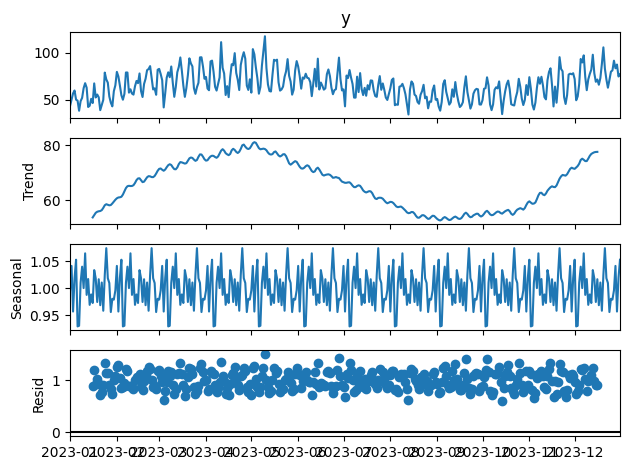

In [9]:

# Set the date as the index
# df.set_index('ds', inplace=True)

# Decompose the time series

# Plot the decomposed components
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
# decomposition.observed.plot(ax=ax1)
# ax1.set_ylabel('Observed')
# decomposition.trend.plot(ax=ax2)
# ax2.set_ylabel('Trend')
# decomposition.seasonal.plot(ax=ax3)
# ax3.set_ylabel('Seasonal')
# decomposition.resid.plot(ax=ax4)
# ax4.set_ylabel('Residual')
# plt.tight_layout()
# plt.show()
